# IMPORTING LIBRARIES

In [148]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# DATASET LOADING

In [149]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\Delhi_AQI_Dataset.csv")

# Explore the dataset 

In [150]:
data.head() # First 5 rows

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,Unnamed: 10
0,Delhi,01/01/18,406,223.3,438.48,336.98,462.84,4.26,385.7,NaN,NaN
1,Delhi,02/01/18,418,229.9,451.44,346.94,476.52,4.39,397.1,NaN,NaN
2,Delhi,03/01/18,382,210.1,412.56,317.06,435.48,4.01,362.9,NaN,NaN
3,Delhi,04/01/18,366,201.3,395.28,303.78,417.24,3.84,347.7,NaN,NaN
4,Delhi,05/01/18,390,214.5,421.20,323.70,444.60,4.10,370.5,NaN,NaN


In [151]:
data.tail(5)

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,Unnamed: 10
2186,Delhi,27/12/24,353,194.15,381.24,292.99,402.42,3.71,335.35,NaN,NaN
2187,Delhi,28/12/24,139,76.45,150.12,115.37,158.46,1.46,132.05,NaN,NaN
2188,Delhi,29/12/24,225,123.75,243.00,186.75,256.50,2.36,213.75,NaN,NaN
2189,Delhi,30/12/24,173,95.15,186.84,143.59,197.22,1.82,164.35,NaN,NaN
2190,Delhi,31/12/24,283,155.65,305.64,234.89,322.62,2.97,268.85,NaN,NaN


In [152]:
data.shape

(2191, 11)

In [153]:
print(data.columns)


Index(['City', 'Date', 'AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


 # Remove useless columns 

In [154]:
cols_to_drop = ["City","Unnamed: 9", "Unnamed: 10","Date"]
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

In [155]:
data.shape

(2191, 7)

In [156]:
data

,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,406,223.30,438.48,336.98,462.84,4.26,385.70
1,418,229.90,451.44,346.94,476.52,4.39,397.10
2,382,210.10,412.56,317.06,435.48,4.01,362.90
3,366,201.30,395.28,303.78,417.24,3.84,347.70
4,390,214.50,421.20,323.70,444.60,4.10,370.50
...,...,...,...,...,...,...,...
2186,353,194.15,381.24,292.99,402.42,3.71,335.35
2187,139,76.45,150.12,115.37,158.46,1.46,132.05
2188,225,123.75,243.00,186.75,256.50,2.36,213.75
2189,173,95.15,186.84,143.59,197.22,1.82,164.35


# Handle missing values

In [157]:
data.isnull().sum()

AQI      0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
O3       0
dtype: int64

# Remove duplicates

In [158]:
data.duplicated().sum()

np.int64(1781)

In [159]:
data.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,208.285714,114.557143,224.948571,172.877143,237.445714,2.187307,197.871429
std,106.614654,58.638060,115.143827,88.490163,121.540706,1.119494,101.283922
min,41.000000,22.550000,44.280000,34.030000,46.740000,0.430000,38.950000
25%,117.000000,64.350000,126.360000,97.110000,133.380000,1.230000,111.150000
50%,190.000000,104.500000,205.200000,157.700000,216.600000,2.000000,180.500000
75%,289.000000,158.950000,312.120000,239.870000,329.460000,3.030000,274.550000
max,494.000000,271.700000,533.520000,410.020000,563.160000,5.190000,469.300000


# Exploratory Data Analysis (EDA)

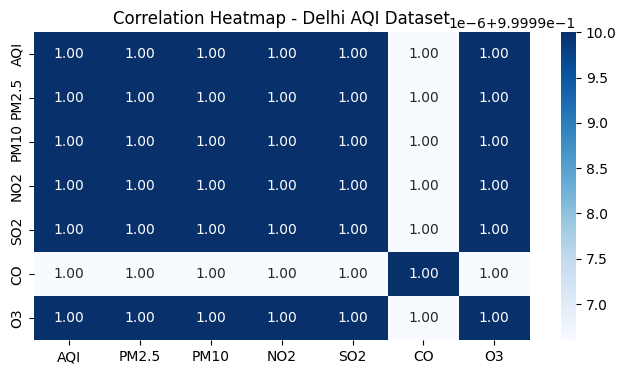

In [160]:
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Blues", fmt='.2f')
plt.title("Correlation Heatmap - Delhi AQI Dataset")
plt.show()

In [163]:
# Create a new binary target variable based on a threshold
data['is_good_air_quality'] = data['AQI'].apply(lambda x: 1 if x < 100 else 0)

In [164]:
# Explicitly convert the new column to integer type to prevent a mix of types
data['is_good_air_quality'] = data['is_good_air_quality'].astype(int)

# Train-Test Split

In [165]:
X = data.drop(columns=['AQI', 'is_good_air_quality'])
y = data['is_good_air_quality']


In [166]:
x

,AQI,PM2.5,PM10,NO2,SO2,CO
0,406,223.30,438.48,336.98,462.84,4.26
1,418,229.90,451.44,346.94,476.52,4.39
2,382,210.10,412.56,317.06,435.48,4.01
3,366,201.30,395.28,303.78,417.24,3.84
4,390,214.50,421.20,323.70,444.60,4.10
...,...,...,...,...,...,...
2186,353,194.15,381.24,292.99,402.42,3.71
2187,139,76.45,150.12,115.37,158.46,1.46
2188,225,123.75,243.00,186.75,256.50,2.36
2189,173,95.15,186.84,143.59,197.22,1.82


In [167]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: is_good_air_quality, Length: 2191, dtype: int64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [169]:
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (1752, 6) Testing set: (439, 6)


# Model Training

In [170]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [171]:
y_pred = model.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100}")

Model Accuracy: 100.0


In [173]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00        78

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [174]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[361   0]
 [  0  78]]


In [175]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Good', 'Good']

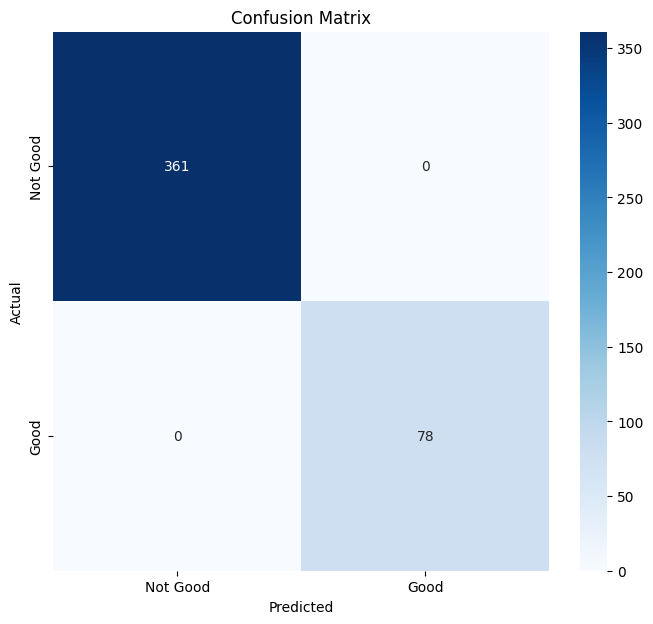

In [176]:
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()